Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as npz
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/CNN_Assignment/CNN_assignment/Test")


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:

# Define the path to the directory containing your dataset
train_dir = '/content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train'
test_dir = '/content/drive/MyDrive/CNN_Assignment/CNN_assignment/Test'

# Define parameters for loading the dataset
batch_size = 32
image_size = (180, 180)  # Adjust the size according to your model requirements

# Use image_dataset_from_directory to load the dataset
train_ds = image_dataset_from_directory(
    train_dir,
    shuffle=True,
    seed=123,
    batch_size=batch_size,
    image_size=image_size
)

val_ds = image_dataset_from_directory(
    test_dir,
    seed=123,
    shuffle=False,  # Set to False for the test set to keep the order
    batch_size=batch_size,
    image_size=image_size
)

Found 11239 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### created a code to visualize one instance of all the nine classes present in the dataset

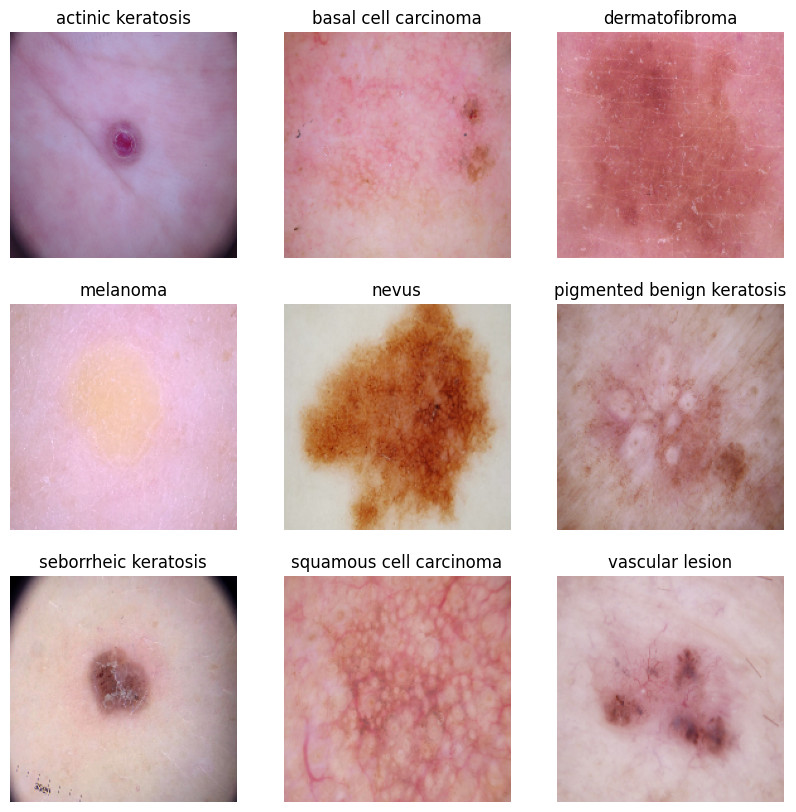

In [ ]:
def visualize_dataset(dataset, class_names):
    plt.figure(figsize=(10, 10))

    # Iterate through each batch
    for images, labels in dataset.take(1):
        # Convert one-hot encoded labels to class indices
        class_indices = [0,1,2,3,4,5,6,7,8]

        # Iterate through each class
        for i, class_index in enumerate(class_indices):
            # Find the index of the first occurrence of the class in the batch
            index = next((j for j, idx in enumerate(class_indices) if idx == class_index), None)
            if index is not None:
                # Display the image
                plt.subplot(3, 3, i + 1)
                plt.imshow(images[index].numpy().astype("uint8"))
                plt.title(class_names[class_index])
                plt.axis("off")

    plt.show()

# Visualize the training dataset
visualize_dataset(train_ds, class_names)

This dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Create the model
#### Creating a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Create the CNN model
model = tf.keras.Sequential([
    # Preprocessing layer to normalize pixel values between (0, 1)
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output to feed into densely connected layers
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, activation='relu'),

    # Output layer with 9 units (one for each class) and softmax activation
    layers.Dense(1, activation='softmax')
])

### Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 147s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 137s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 133s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 4/20
70/70 [==============================] - 141s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 132s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 6/20
70/70 [==============================] - 140s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 7/20
70/70 [==============================] - 130s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - v

### Visualizing training results

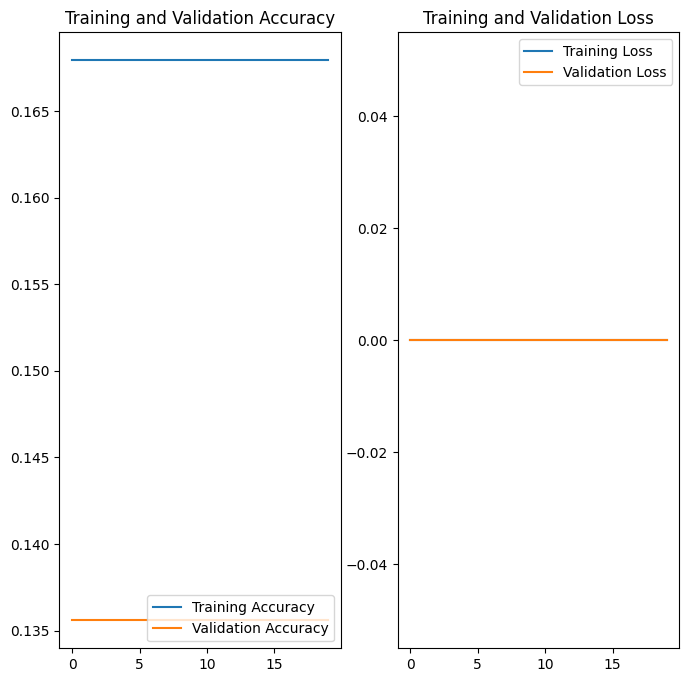

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

Looking at the provided training history:

Both training and validation accuracies are consistently around 16.79%.
Both training and validation losses remain at 0.0000e+00.
These observations suggest that the model is not learning properly, and there might be underfitting. To address this, we can try a more complex model architecture and introduce data augmentation to increase the diversity of training samples.

Here's an example of how you can incorporate data augmentation into your model using ImageDataGenerator

#### Model with augmentation strategy

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert train_ds to a NumPy array
train_images, train_labels = [], []
for images, labels in train_ds:
    train_images.append(images.numpy())
    train_labels.append(labels.numpy())

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:


# Apply data augmentation during training
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 152s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 160s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 153s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 4/20
70/70 [==============================] - 152s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 153s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 6/20
70/70 [==============================] - 146s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 7/20
70/70 [==============================] - 154s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - v

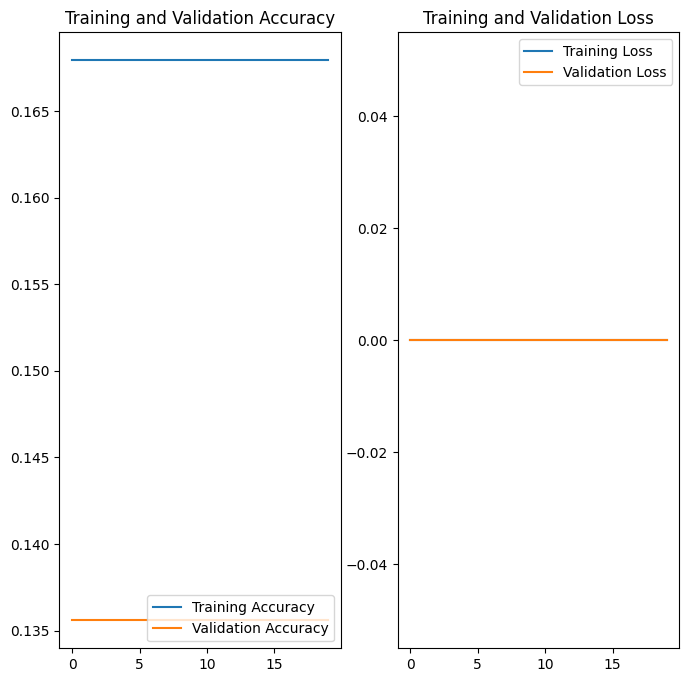

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Load one instance from the training dataset
sample_image, _ = next(iter(train_ds))

# Convert the image to a NumPy array
sample_image = sample_image[0].numpy()

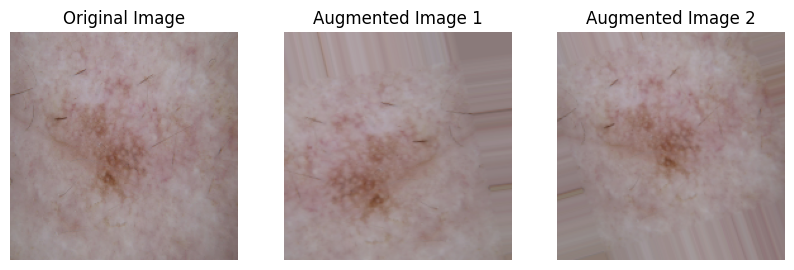

In [ ]:
# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(sample_image.astype("uint8"))
plt.title('Original Image')
plt.axis('off')

# Apply data augmentation and display augmented images
augmented_images = []
for i in range(2):  # Display two augmented versions
    augmented_image = datagen.random_transform(sample_image)
    augmented_images.append(augmented_image)

    plt.subplot(1, 3, i + 2)
    plt.imshow(augmented_image.astype("uint8"))
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.show()

## Creating model with dropout layer

In [ ]:
# Define the model outside tf.function
model_with_dropout = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='softmax')
])

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])




In [ ]:
# Display the model summary
model_with_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                   

In [ ]:
# Apply data augmentation during training
epochs =20
history = model_with_dropout.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


70/70 [==============================] - 232s 3s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 182s 3s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 183s 3s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 4/20
70/70 [==============================] - 178s 3s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 175s 2s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 6/20
70/70 [==============================] - 183s 3s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.0000e+00 - val_accuracy: 0.1356
Epoch 7/20
70/70 [==============================] - 176s 3s/step - loss: 0.0000e+00 - accuracy: 0.1679 - val_loss: 0.

### Visualizing the results

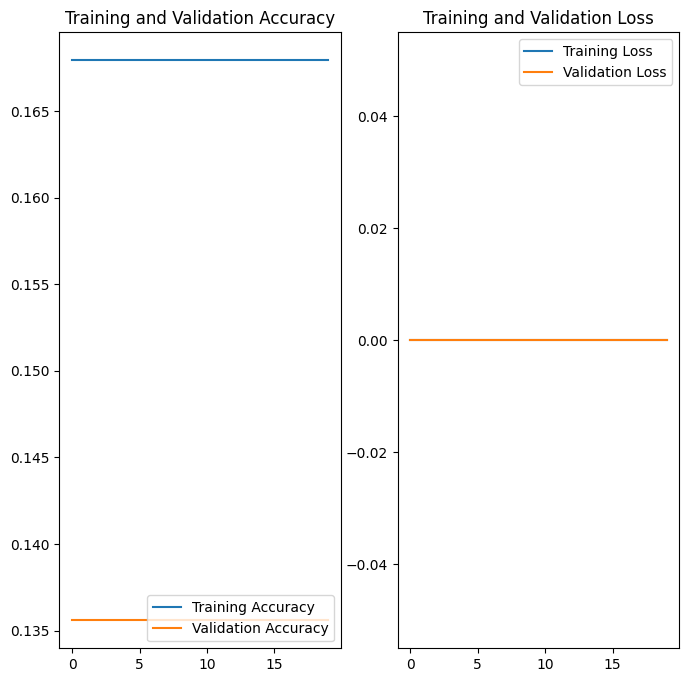

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training history you've provided indicates that the model is not learning effectively. Both the training accuracy and validation accuracy are stuck at approximately 16.79%, and the loss values are not decreasing. This suggests that the model is not converging, and there may be issues with the model architecture, hyperparameters, or data.



In [ ]:
# Calculate the count of each class label
class_counts = np.bincount(train_labels)

# Assuming your class labels are integers starting from 0
class_labels = np.arange(len(class_counts))

# Display the distribution of classes
for label, count in zip(class_labels, class_counts):
    print(f"Class {label}: {count} samples")

Class 0: 1114 samples
Class 1: 1376 samples
Class 2: 1095 samples
Class 3: 1438 samples
Class 4: 1357 samples
Class 5: 1462 samples
Class 6: 1077 samples
Class 7: 1181 samples
Class 8: 1139 samples


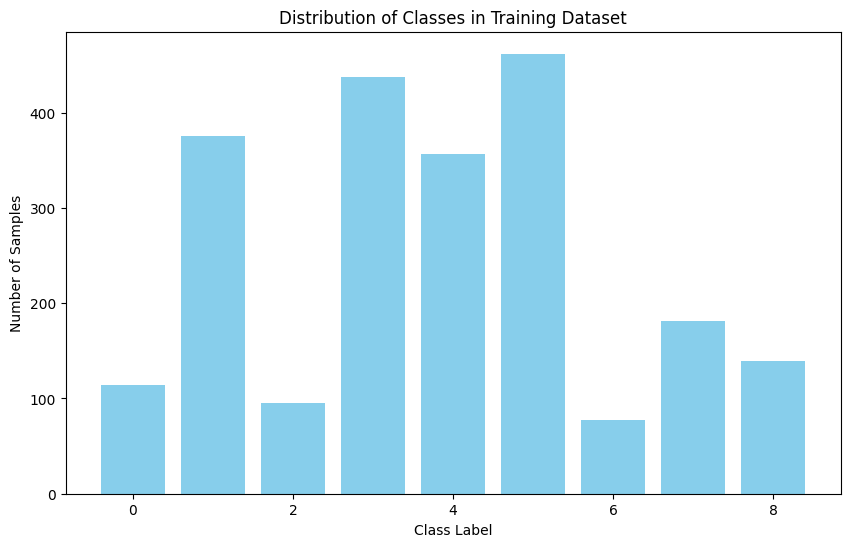

In [ ]:
# Calculate the count of each class label
class_counts = np.bincount(train_labels)

# Assuming your class labels are integers starting from 0
class_labels = np.arange(len(class_counts))

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in Training Dataset')
plt.show()

It can be observed that Class 6 has the least number of samples with 77 samples.

In [ ]:
# Calculate the total number of samples
total_samples = np.sum(class_counts)

# Calculate the proportionate number of samples for each class
class_proportions = class_counts / total_samples * 100

# Print the proportionate number of samples for each class
for label, proportion in zip(class_labels, class_proportions):
    print(f"Class {label}: {proportion:.2f}%")

Class 0: 5.09%
Class 1: 16.79%
Class 2: 4.24%
Class 3: 19.56%
Class 4: 15.94%
Class 5: 20.63%
Class 6: 3.44%
Class 7: 8.08%
Class 8: 6.21%


Class 5 dominate the data in terms proportionate number of samples

#### Rectify the class imbalance

add more samples across all classes so that none of the classes have very few samples using Augmentor

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE51C7EE7A0>: 100%|██████████| 500/500 [00:27<00:00, 18.19 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DE51C6EFE80>: 100%|██████████| 500/500 [00:26<00:00, 19.09 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE51C658130>: 100%|██████████| 500/500 [00:24<00:00, 20.51 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DE525305660>: 100%|██████████| 500/500 [01:58<00:00,  4.22 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7DE51C7EDEA0>: 100%|██████████| 500/500 [01:42<00:00,  4.87 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DE51C6EF7C0>: 100%|██████████| 500/500 [00:23<00:00, 21.37 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DE540B15900>: 100%|██████████| 500/500 [00:51<00:00,  9.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE51C7EE740>: 100%|██████████| 500/500 [00:23<00:00, 21.38 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DE51C653430>: 100%|██████████| 500/500 [00:24<00:00, 20.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
import os

# Assuming data_dir_train is the path to your training dataset
path_list = [x for x in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
# Create a DataFrame with custom column names
original_df = pd.DataFrame(list(zip(path_list, class_labels)), columns=['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-44-1988873b9ab8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Training the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Creating Trains_ds and val_ds using new_df created from augmentor

In [ ]:
data_dir_train="/content/drive/MyDrive/CNN_Assignment/CNN_assignment/Train/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
from tensorflow.keras import layers, models
# Define image dimensions
img_height, img_width = 180, 180


# Create the model
model = models.Sequential()

# Data normalization
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))


#### Creating model including normalization

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

Training my model

In [ ]:
# Set the number of epochs
epochs = 20

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 798s 5s/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151
Epoch 2/20
169/169 [==============================] - 489s 3s/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151
Epoch 3/20
169/169 [==============================] - 488s 3s/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151
Epoch 4/20
169/169 [==============================] - 473s 3s/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151
Epoch 5/20
169/169 [==============================] - 485s 3s/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151
Epoch 6/20
169/169 [==============================] - 474s 3s/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151
Epoch 7/20
169/169 [==============================] - 469s 3s/step - loss: 0.0000e+00 - accuracy: 0.1337 

### Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Conclusion
### Training Accuracy:

The training accuracy remains constant at approximately 0.1337 for all epochs. This constant accuracy might indicate that the model is not effectively learning from the training data.


### Validation Metrics:

The validation loss is consistently reported as 0.0000e+00, and the validation accuracy remains at 0.1151 for all epochs. This suggests that the model's performance on unseen validation data is not improving, indicating potential issues with generalization or the validation process.
In summary, both the training and validation metrics show patterns that suggest the model is not effectively learning or generalizing from the provided data. Further investigation into the model architecture, loss function, and data characteristics may be needed to improve performance.